# Python Basics For Scientific Data Analysis

In this part of the tutorial you'll run the code snippets below. Comment on *each* line to describe what that line of code does. 

We'll start by importing some important modules. 

First we import numpy. You can find the documentation to numpy [here](https://docs.scipy.org/doc/numpy-1.14.0/reference/). 

We then import the module matplotlib which allows us to create plots and other figures. You can discover more about matplotlib [here](https://matplotlib.org/index.html) and I suggest also browsing through their [collection of examples](https://matplotlib.org/gallery/index.html) (you may find some inspiration for ways to graphically depict your data). 


In [1]:
#First, import some necessary modules
import numpy as np #Importing Numerical Python. Functions in this library will be referred to as, for example, np.sin

import matplotlib #matplotlib is used to make plots
from matplotlib import pyplot as plt #pyplot provides a MATLAB-like plotting environment

#this is for showing plots within the jupyter notebook environment
%matplotlib notebook


## Excercise 1: Logical Indexing

Look at the code below and figure out what each line does. 

Not sure what `np.random.rand` does? There are [ways to find out](http://lmgtfy.com/?iie=1&q=numpy+random+rand) if running the code isn't enough.

<IPython.core.display.Javascript object>


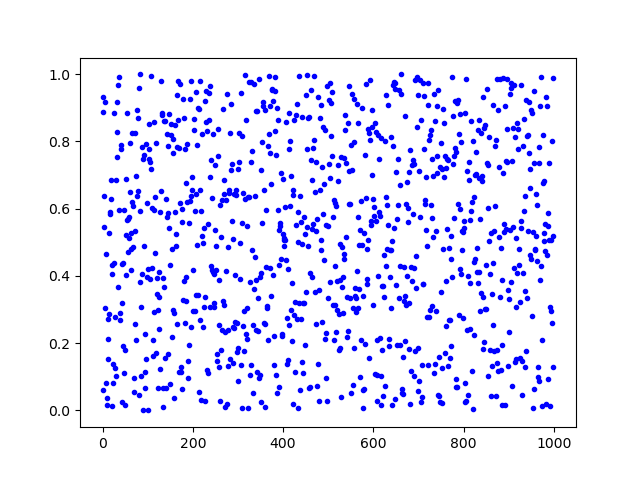

<IPython.core.display.Javascript object>


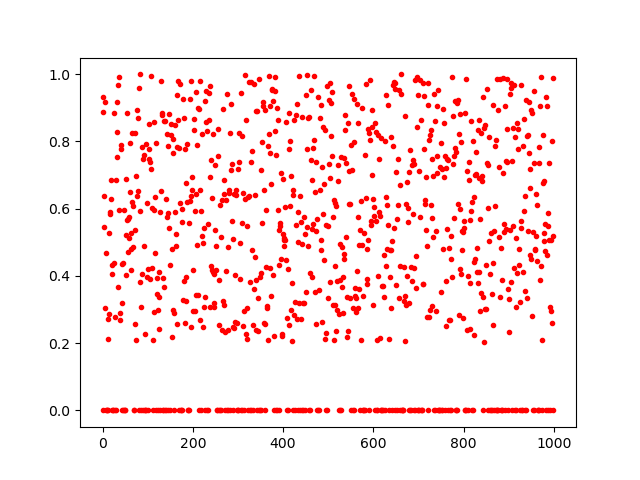

In [2]:
x = np.random.rand(1000)
plt.figure()
plt.plot(x, 'b.')
x[x<0.2] = 0
plt.figure()
plt.plot(x,'r.')

<IPython.core.display.Javascript object>


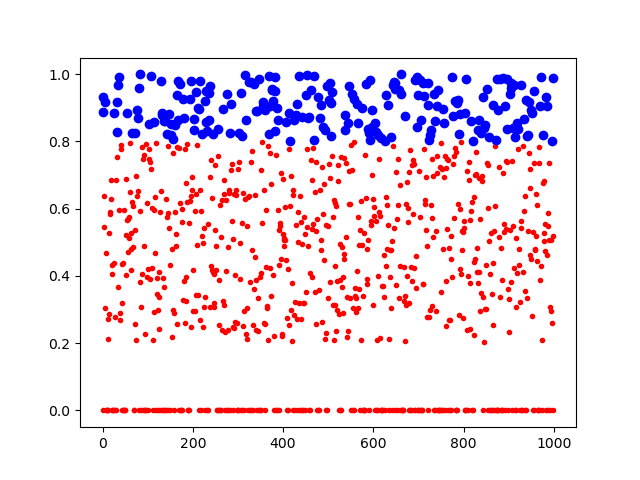

In [3]:
indices_of_bigx = np.where(x>0.8)
plt.figure()
plt.plot(x,'r.')
plt.plot(indices_of_bigx[0], x[indices_of_bigx[0]],'bo')

## Exercise 2: Fourier Transforms

What is the frequency of the sine wave plotted below?

<IPython.core.display.Javascript object>


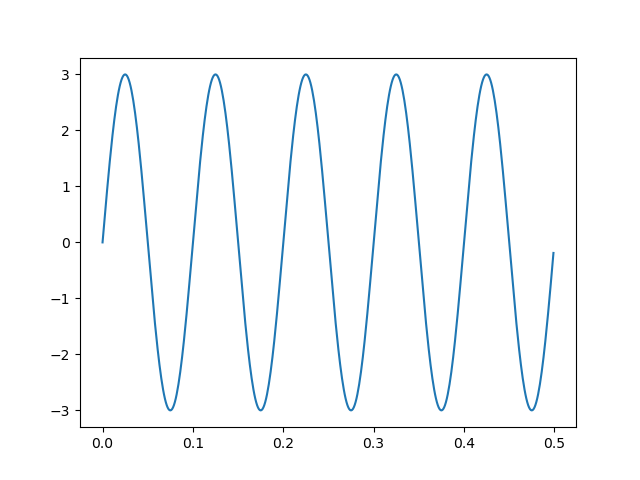

In [5]:
Fs = 1000  #Sampling frequency (number of pts per second)
dt = 1./Fs 
t = np.arange(0,10,dt) 
y = 3*np.sin(2*np.pi*10*t)
plt.figure()
plt.plot(t[:500], y[:500]) 

<IPython.core.display.Javascript object>


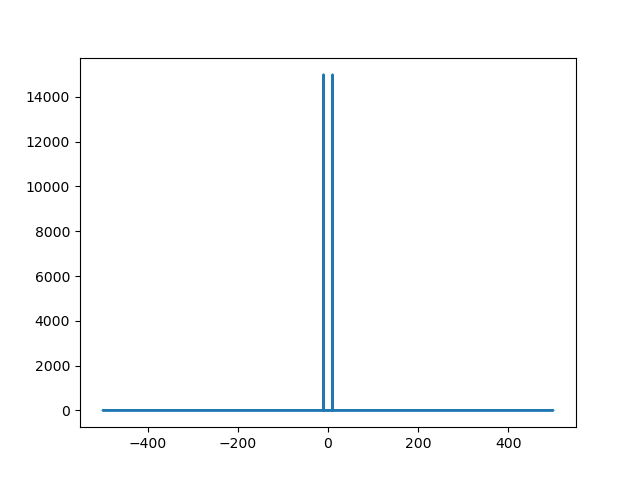

In [6]:
Y = np.fft.fft(y)
freq = np.fft.fftfreq(len(y), dt)
plt.figure()
plt.plot(freq, abs(Y))

<IPython.core.display.Javascript object>


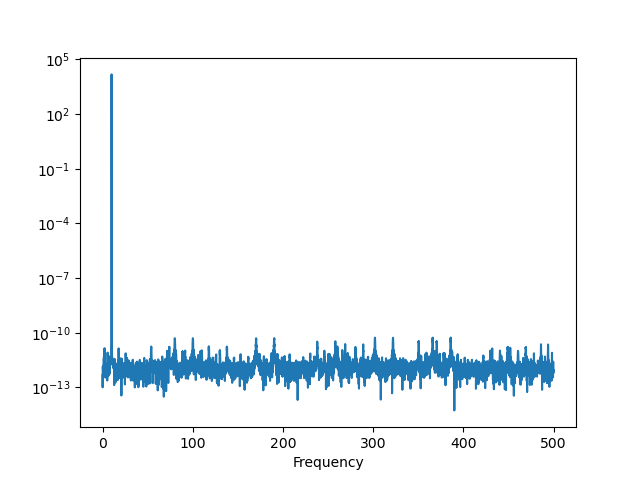

<IPython.core.display.Javascript object>


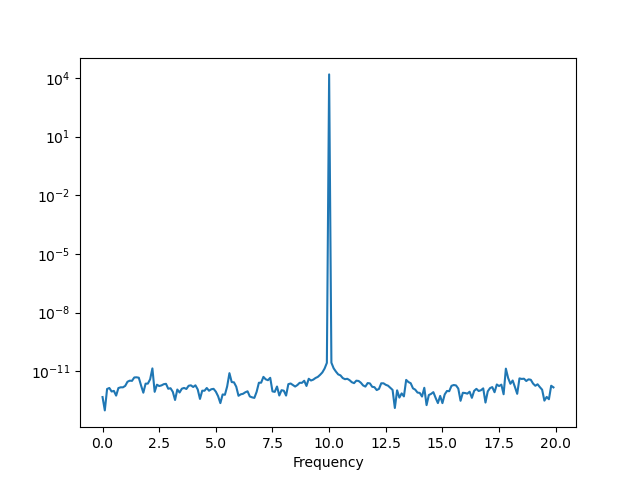

Text(0.5, 0, 'Frequency')

In [8]:
plt.figure()
plt.semilogy(freq[:int(len(freq)/2)], abs(Y)[:int(len(freq)/2)])
plt.xlabel("Frequency")
plt.figure()
plt.semilogy(freq[:int(len(freq)/2)][0:200], abs(Y)[:int(len(freq)/2)][0:200])
plt.xlabel("Frequency")

Explain what the last two plots generated in this excercise represent. What is different about the two? What information do they contain?

## Excercise 3: Reading and Writing Data Files, Part 1

Here, we'll get a list of the files in the current directory. We'll then write that list to a text file. We'll use the library <code>glob</code> for globbing purposes. What's [globbing](https://en.wikipedia.org/wiki/Glob_(programming))?

In [11]:
import glob
list_of_files = glob.glob('*.*')
print("%i files found in current directory." % len(list_of_files))
text_file = open("OutputListOfFiles.txt","w") #The "w" means this file is for writing into

#Here I use "enumerate" which is a powerful way of looping
#Enumerate returns two things -- the index of the item and the item
for idx,filename in enumerate(list_of_files):
    text_file.write("File number %i is %s \n" % (idx+1, filename))
text_file.close()

15 files found in current directory.


Look at the file you created. Does it have a list of the other files in the directory? 

We used [<code>enumerate</code>](https://docs.python.org/2.7/library/functions.html#enumerate) above. It can be a confusing thing to use so below is another example of using this feature.

In [13]:
list_of_creatures = ['dog','cat','moose','horse','elephant']
for index,creature in enumerate(list_of_creatures):
    print("Creature number %i is %s" % (index, creature))

Creature number 0 is dog
Creature number 1 is cat
Creature number 2 is moose
Creature number 3 is horse
Creature number 4 is elephant


Are all these "%" confusing? Read [here](https://www.learnpython.org/en/String_Formatting) on how to format strings. Note that there are other options for formatting strings. 

## Excercise 4: Reading and Writing Data Files, Part 2

You'll first read data from an Excel file. Then you'll save that data into a Numpy file which is an easy and convenient way to save data for later retrieval using Python. 

Before you start, you'll need an Excel file with some data. So make one with a couple columns like shown below. *Make sure you save the file as a comma separated values file (.CSV).*
![Excel example](ExcelExample.png)

<IPython.core.display.Javascript object>


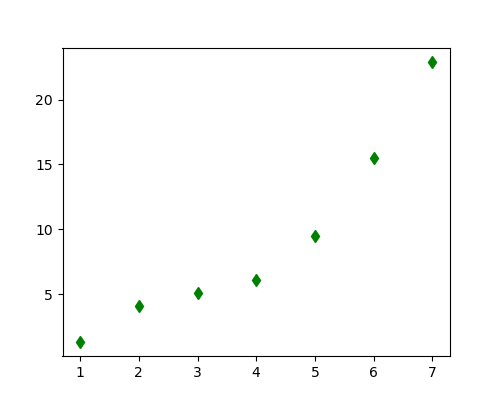

In [14]:
file_name = 'PythonTutorialExcelData.csv' #Use whatever you called the file
excel_data = np.loadtxt(file_name, delimiter=',')
fig,ax = plt.subplots(figsize=(5,4))
ax.plot(excel_data[:,0], excel_data[:,1],'gd')

Let's fit that data to a second order polynomial. 

<IPython.core.display.Javascript object>


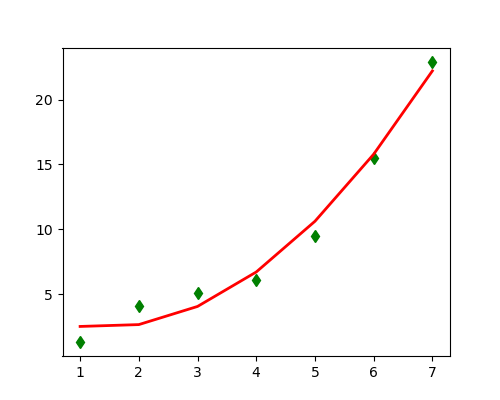

Fit function is y = 0.629 x^2 + -1.743 x + 3.614


In [16]:
fit_result = np.polyfit(excel_data[:,0], excel_data[:,1], 2)
fig,ax = plt.subplots(figsize=(5,4))
ax.plot(excel_data[:,0], excel_data[:,1],'gd')
ax.plot(excel_data[:,0], np.polyval(fit_result,excel_data[:,0]),'-r',lw=2)
print("Fit function is y = %.3f x^2 + %.3f x + %.3f" % (fit_result[0], fit_result[1], fit_result[2]))

Let's say we want to save this data we loaded from Excel (though it's already in that csv file). We'll save it as a <code>.npy</code> file which is easy to then load back into Python. We use the <code>np.save</code> and <code>np.load</code> functions as shown below.

In [17]:
np.save("CopyOfExcelDataForPython.npy", excel_data)

#That data can then be reloaded using:
excel_data_copy = np.load(glob.glob("CopyOf*.npy")[0]) #Can you follow what is done here with glob?

Now, say we want to also save that fit I did. And also save the filename where the data originally came from (the CSV Excel file). Such data is not just an array. So we can't use <code>np.save</code>. Instead, we'll tidy up the data we want saved into a [dictionary](https://www.tutorialspoint.com/python/python_dictionary.htm) (a powerful data structure in Python) and we'll use <code>pickle</code> to store that.

In [19]:
import pickle
dictionary_of_data = {}
dictionary_of_data['ExcelFilename'] = 'PythonTutorialExcelData.csv'
dictionary_of_data['excel_data'] = excel_data
dictionary_of_data['fit'] = fit_result
pickle.dump(dictionary_of_data, open("saved_dictionary.p","wb"))

In [22]:
#We can now load that saved dictionary with pickle.load
d = pickle.load(open("saved_dictionary.p","rb"))
print("The 'keys' within the dictionary are", d.keys())

The 'keys' within the dictionary are dict_keys(['ExcelFilename', 'excel_data', 'fit'])


<IPython.core.display.Javascript object>


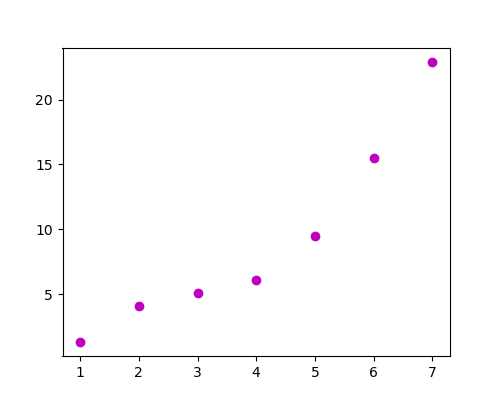

In [23]:
#How would we access the Excel data in the dictionary?
fig,ax = plt.subplots(figsize=(5,4))
ax.plot(d['excel_data'][:,0], d['excel_data'][:,1],'mo')

## Excercise 5: Modeling and Fitting Data

Let's model the viral load of HIV as a function of time. We will model the concentration of HIV, $V$, in the blood as a function of time, $t$, after treatment as:
$$V(t) = X e^{-\alpha t} + C$$
where $X$, $\alpha$, and $C$ are parameters.

In [24]:
#Defining the function
def viralLoadConc(parameters, time):
    X = parameters[0]
    alpha = parameters[1]
    C = parameters[2]
    viralLoad = X*np.exp(-1*alpha*time) + C
    return viralLoad

Let's just investigate what that function does. We'll make an array of times from 0 to 2 in steps of 0.1 using the function <code>np.arange</code>.

<IPython.core.display.Javascript object>


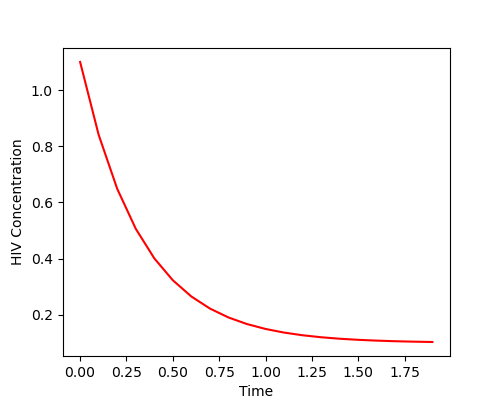

Text(0, 0.5, 'HIV Concentration')

In [25]:
t = np.arange(0,2,0.1)
params = [1,3,0.1]
V = viralLoadConc(params, t)
fig,ax = plt.subplots(figsize=(5,4))
ax.plot(t,V,'-r')
ax.set_xlabel("Time")
ax.set_ylabel("HIV Concentration")

Now we'll use some real data. The data can be found [here](http://www.physics.upenn.edu/biophys/PMLS/Datasets/) but should also be in the folder on class website.

In [27]:
real_data = np.load('HIVseries.npy')
real_data.shape #When loading unknown data, always helpful to show the dimensions of the array

(16, 2)

<IPython.core.display.Javascript object>


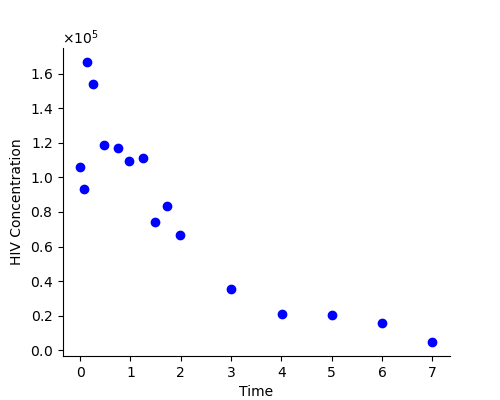

In [28]:
fig,ax = plt.subplots(figsize=(5,4))
ax.plot(real_data[:,0],real_data[:,1],'bo')

ax.set_xlabel("Time")
ax.set_ylabel("HIV Concentration")

#This sets the y-axis tick labels to be in scientific notation
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter)
ax.spines['right'].set_color("none")
ax.spines['top'].set_color("none")

Say we want to fit the data above to the model we made with the three paramters. There are many ways we could do this but let's explore a way that's interactive and very helpful though it takes a bit of extra coding.

Note that if the `ipywidgets` ineractive features isn't working try, in the Anaconda command prompt, running:
> `conda install -c conda-forge ipywidgets`

In [29]:
#first, import necessary modules for interactive capabilities
import ipywidgets as widgets
from ipywidgets import interact, fixed

#define a function to plot the results
def plot_results(X=120000,alpha=0.5,C=1000): 
    fig,ax = plt.subplots(figsize=(5,4))
    ax.plot(real_data[:,0], real_data[:,1],'bo')
    ax.plot(real_data[:,0], viralLoadConc(np.array([X,alpha,C]), real_data[:,0]),'-r')
    

In [30]:
#mpld3.disable_notebook()

#Pass to the function interact the plotting function and the paramters.
#The parameters get a range of values that can vary between.
#If paramter is given three values, last one is the step size.
interact(plot_results,X=(20000, 250000), alpha=(0.01,1,0.05),C=(0.1,10000), continuous_update=False)

interactive(children=(IntSlider(value=120000, description='X', max=250000, min=20000), FloatSlider(value=0.5, …

<function __main__.plot_results(X=120000, alpha=0.5, C=1000)>

With the <code>interact</code> function we can find some nice parameters to use for fitting the data.

In [31]:
initialGuess = np.array([165000, 0.5,1000]) #our initial guess at paramters
def errorFunc(params, data):
    '''
    This function returns the error between the data and the model.
    Arguments:
        params - parameters for model (X, alpha, C)
        data - 2D array. First column is time, second column is viral load
    Returns:
        The difference between the data and the model
    '''
    times = data[:,0]
    viralData = data[:,1]
    theory = viralLoadConc(params, times)
    return viralData-theory

In [33]:
from scipy.optimize import leastsq #import least squares fitting module

bestFit, flag = leastsq(errorFunc, initialGuess, args=(real_data))
print( bestFit)

[ 1.64846509e+05  2.48386292e-01 -2.80686701e+04]


<IPython.core.display.Javascript object>


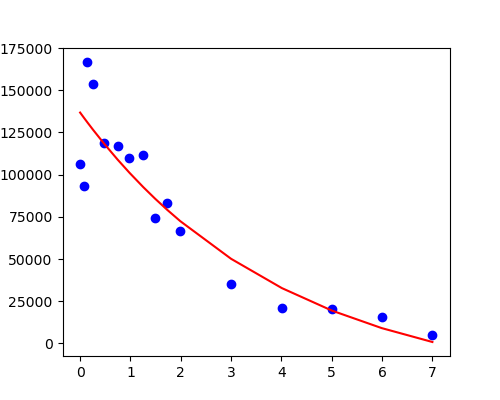

In [34]:
fig,ax = plt.subplots(figsize=(5,4))
ax.plot(real_data[:,0],real_data[:,1],'bo')
ax.plot(real_data[:,0], viralLoadConc(bestFit, real_data[:,0]),'-r')

Note that the best fit parameters may be unphysical. Is that the case here? What could be done if so?

## Excercise 6: Modeling and Fitting Data, Part 2

Consider the following function that can be used to model bacteria activity, $W$, as a function of time, $t$:
$$ W(t) = A (e^{-t/\tau} - 1 + t/\tau)$$

In [36]:
bact_data = np.load("g149novickB.npy")
print ("Dimensions of the loaded dataset:", bact_data.shape)
bact_time = bact_data[:,0] #time in hours
bact_activity = bact_data[:,1] #beta-galactosidase activity (arbitrary units)

Dimensions of the loaded dataset: (20, 2)


#### Your task is to create a code the function modeling bacteria activity (given above). Then find the parameters *A* and $\tau$ that best fit the data. Use the methods described above to do so.